In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats

plt.style.use('default')

In [2]:
PM_and_PI = pd.read_csv('PM_and_PI.csv', sep=';')

In [4]:
def remove_outliers(feature, coef=1.5):
    q1 = feature.quantile(0.25)
    q3 = feature.quantile(0.75)
    IQR_coef = coef * (q3 - q1)
    low_border  = q1 - IQR_coef
    high_border = q3 + IQR_coef
    return feature[(feature>low_border)&(feature<high_border)]

In [5]:
def is_normal(feature, alpha=0.05):
    if len(feature) > 8:
        k2, p = stats.shapiro(feature)
        if p<alpha:
            return True
    return False

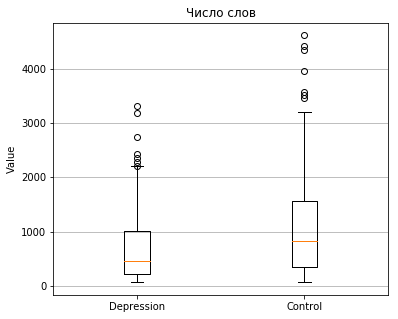

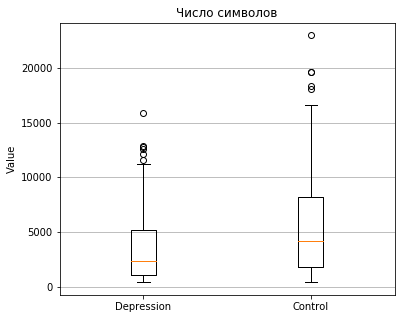

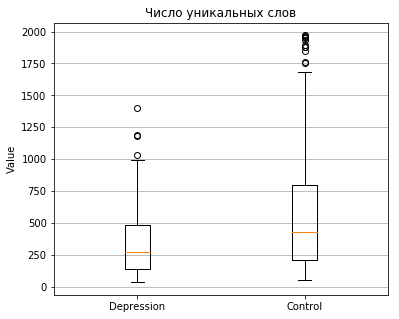

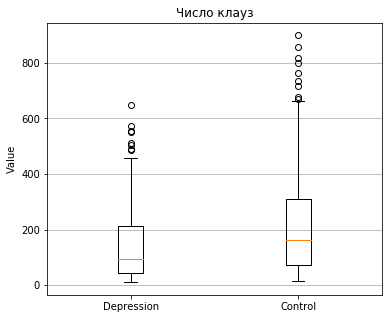

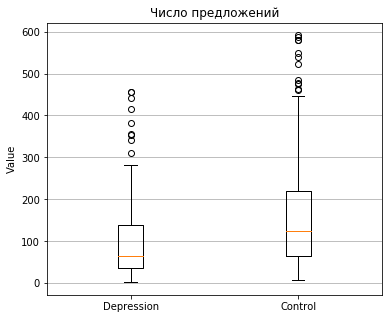

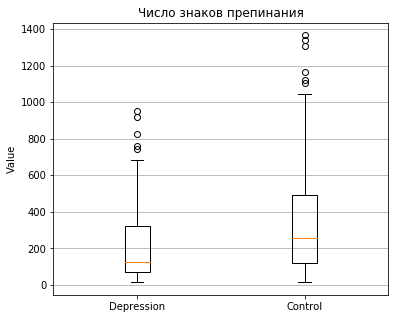

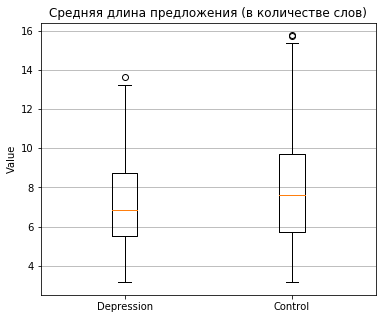

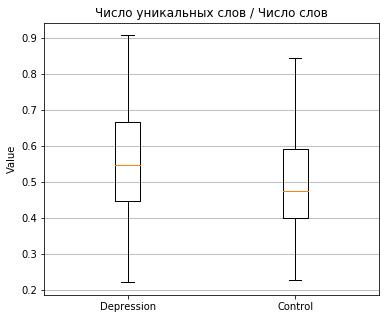

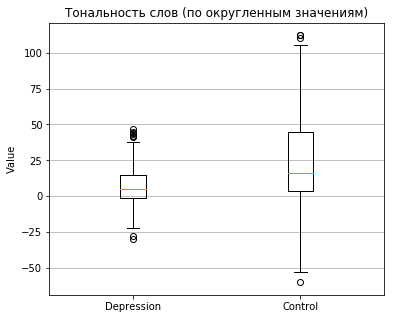

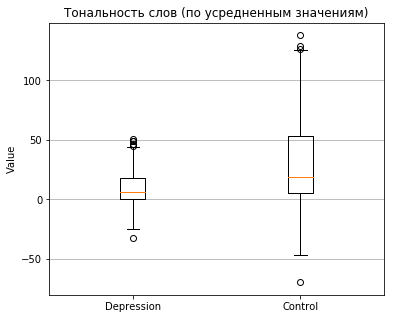

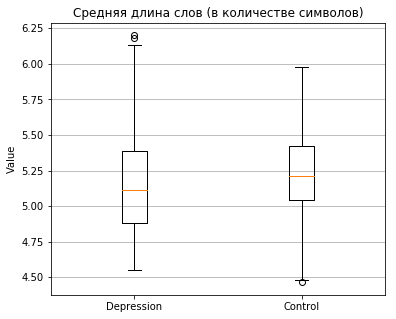

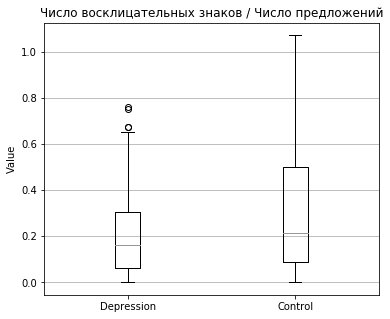

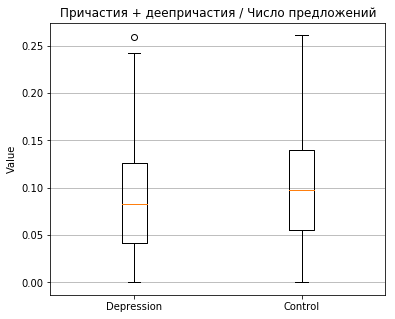

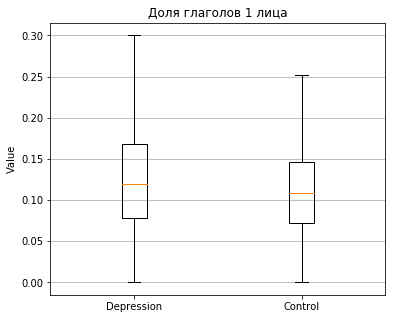

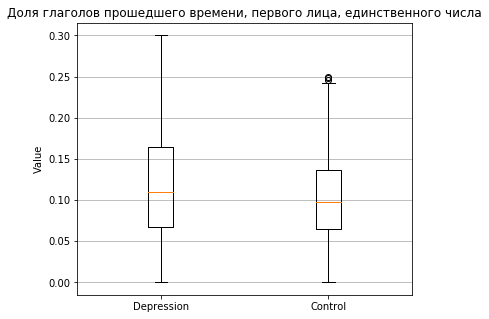

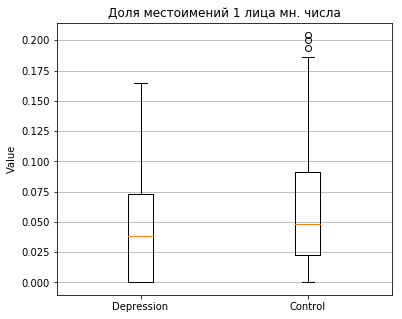

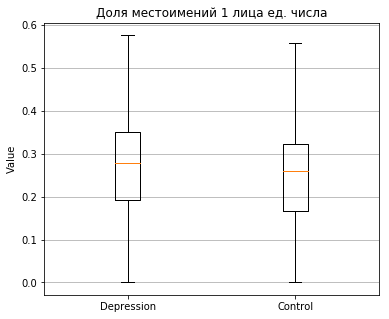

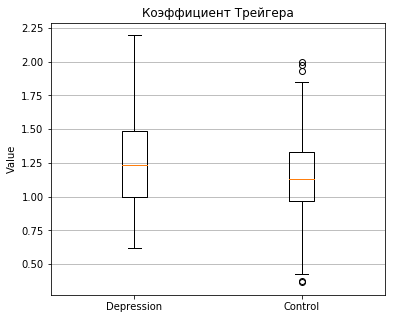

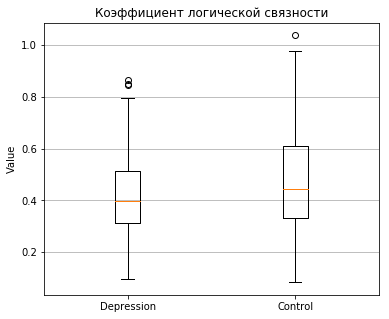

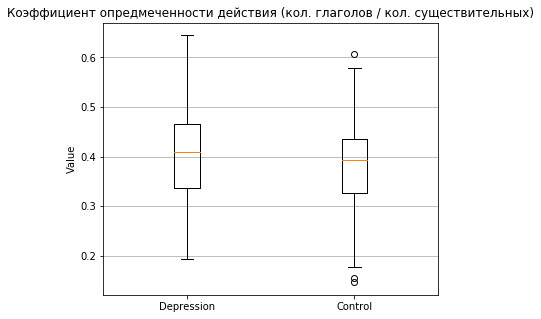

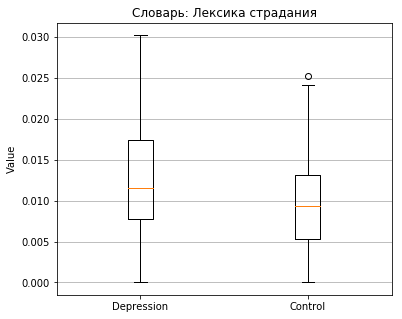

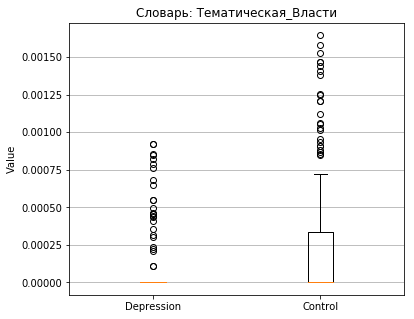

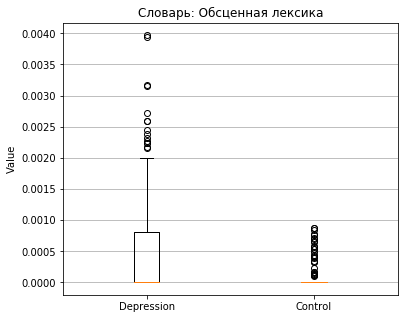

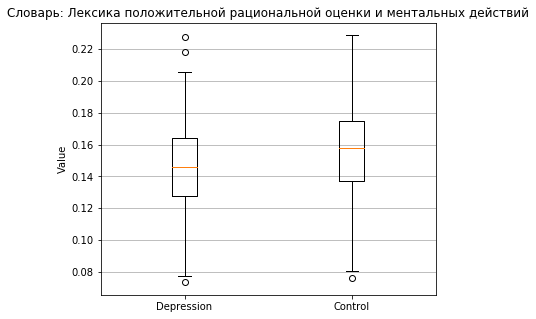

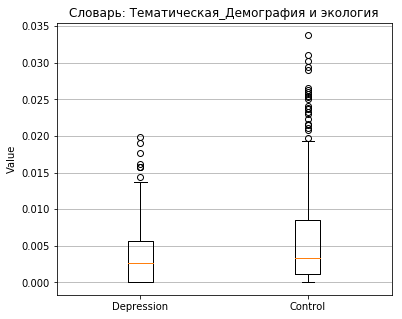

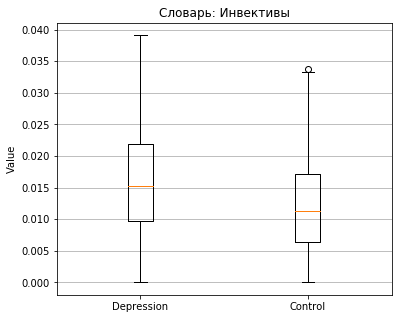

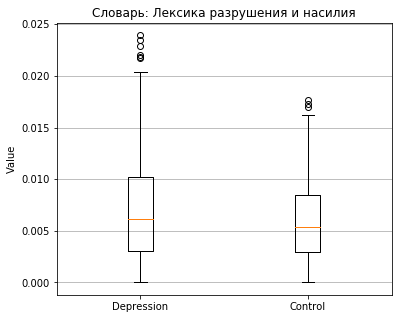

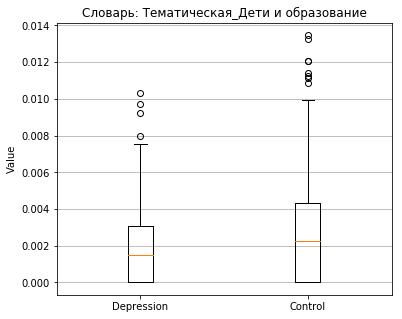

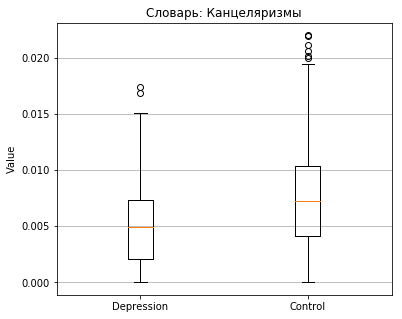

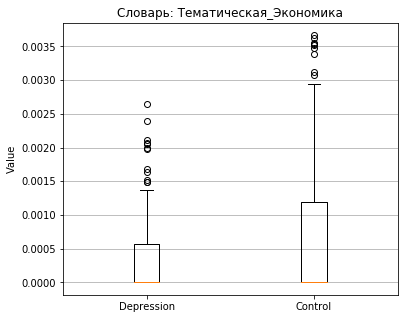

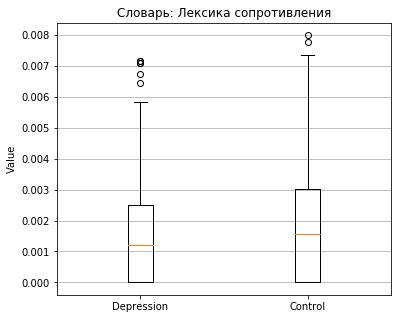

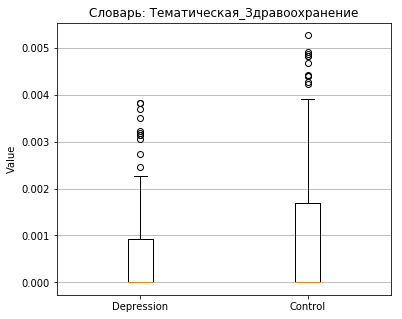

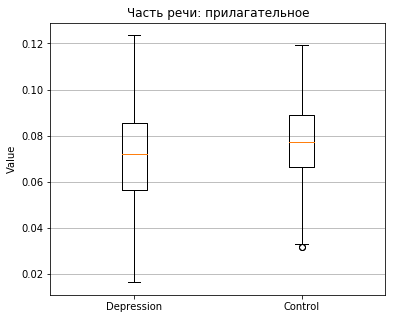

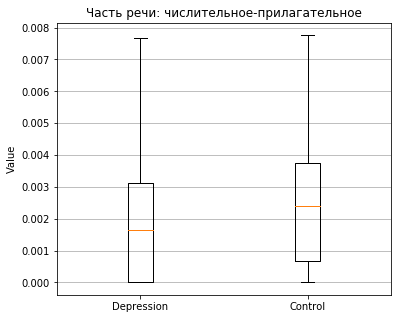

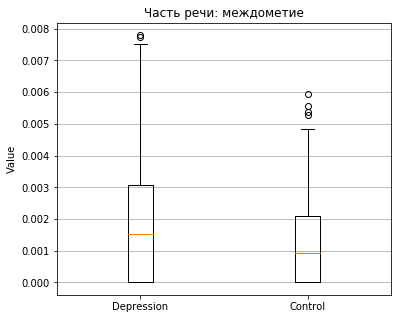

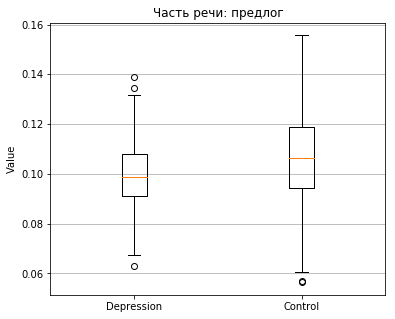

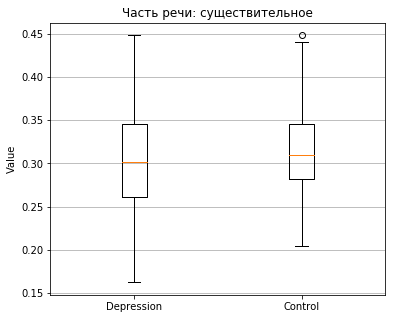

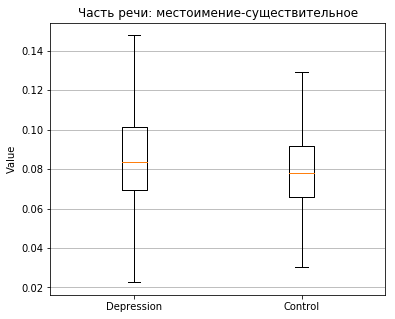

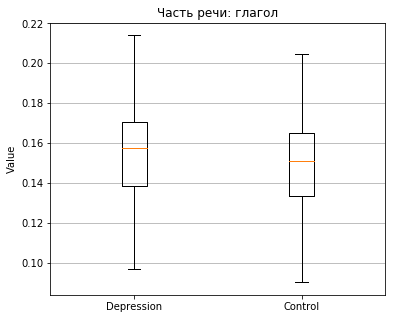

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1657: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


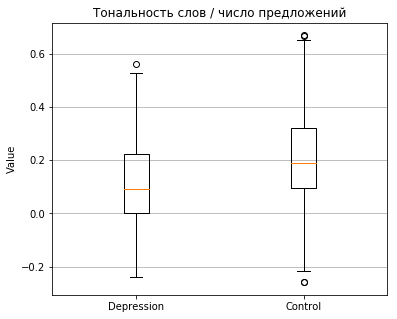

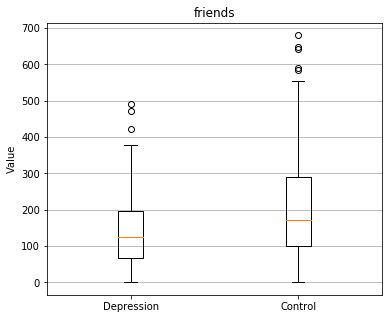

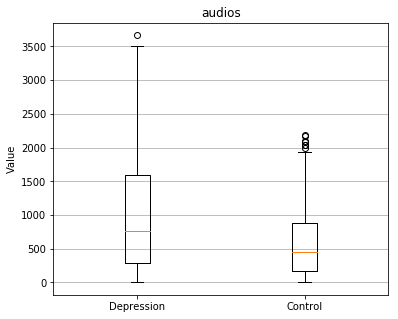

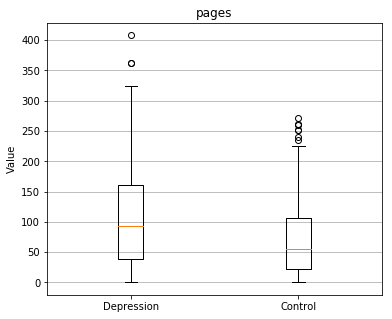

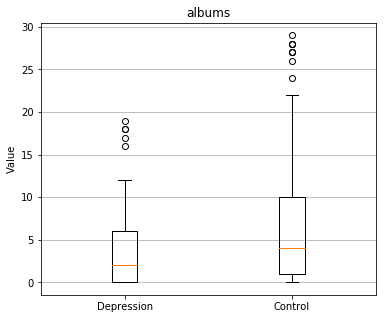

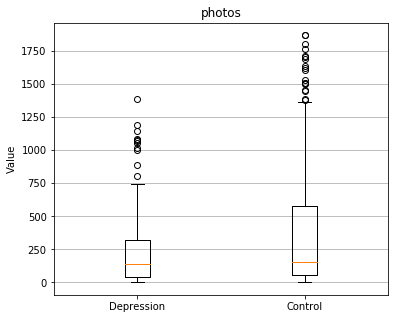

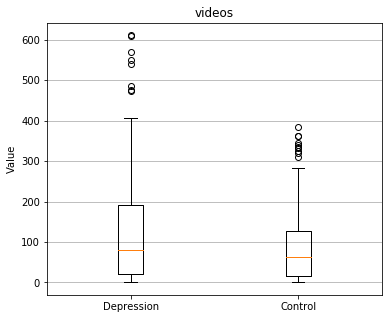

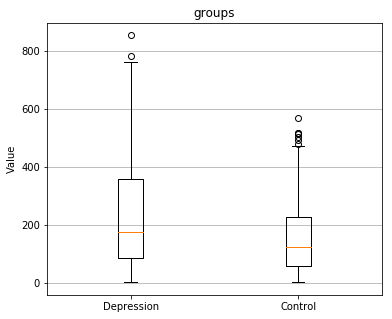

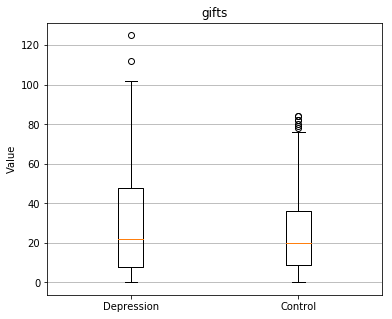

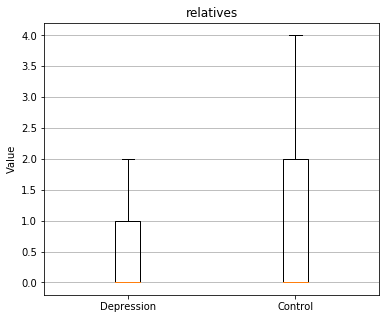

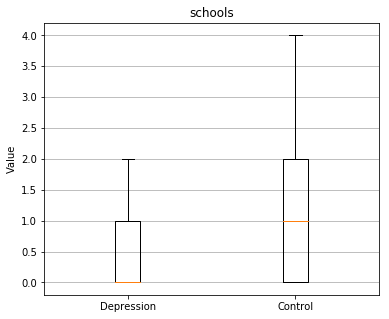

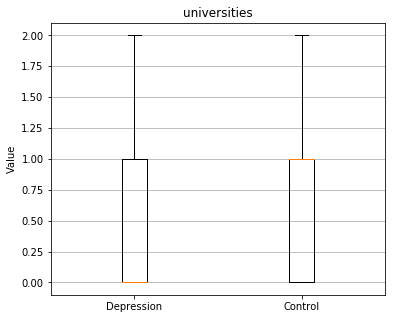

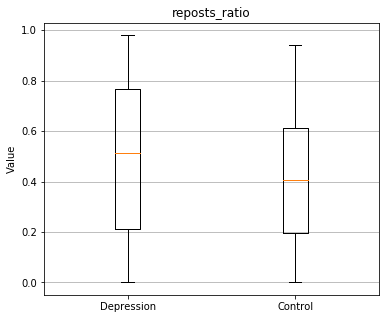

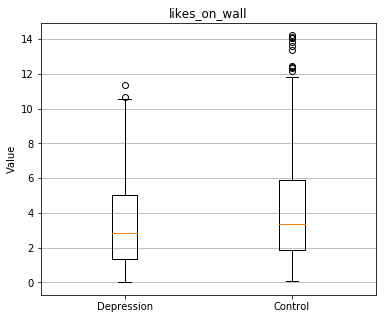

In [6]:
for feature in PM_and_PI.iloc[:,2:]:    
    if is_normal(PM_and_PI[feature], alpha=0.001) and not feature.startswith(('LIWC','Сем.', 'Синт')) and not feature.endswith('smiles'):
        dep_target = remove_outliers(PM_and_PI.loc[PM_and_PI['depression']>=30, feature], coef=1.5)
        control_target = remove_outliers(PM_and_PI.loc[PM_and_PI['depression']<=10, feature], coef=1.5)
        s, pval = stats.ttest_ind(dep_target, control_target, equal_var=True)
        if pval < 0.05:
            
            data_to_plot = [dep_target, control_target]
            fig = plt.figure(1, figsize=(6, 5))
            ax = fig.add_subplot(111)
            ax.set_title(feature)
            ax.grid(True, axis='y')
            bp = ax.boxplot(data_to_plot, notch=False, showmeans=False, meanline=False)
            ax.set_xticklabels(['Depression','Control'])
            ax.set_ylabel('Value')
            plt.show()